In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.decomposition import PCA

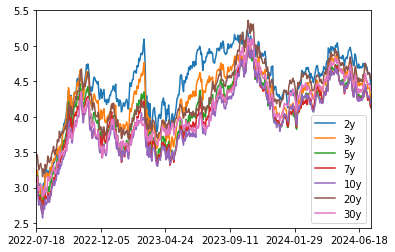

In [3]:
benchmark_curve = pd.read_csv('./data/benchmark_curve.csv', index_col=0)
benchmark_curve.plot()

In [4]:
pca = PCA(n_components=3)
pca.fit_transform(benchmark_curve.diff().dropna())

# % explained by each PC
print(pca.explained_variance_ratio_)

[0.89471702 0.0912205  0.00853336]


Text(0.5,1,'First PC does indeed track the outright yield moves well')

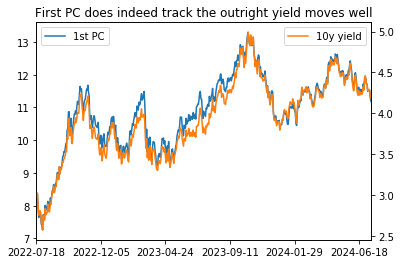

In [18]:
pcs = benchmark_curve @ pca.components_.T 
ax = (-1 * pcs[0]).plot(label='1st PC')
ax2 = benchmark_curve['10y'].plot(secondary_y=True, ax=ax, label='10y yield')
ax.legend(loc='upper left')
ax2.legend(loc=1)
plt.title('First PC does indeed track the outright yield moves well')

### Checks

In [206]:
# check pca
my_df = benchmark_curve.loc['2023-07-14':, ['2y', '7y', '10y']]
my_pca = PCA(n_components=3)
my_pca.fit_transform(my_df.diff().dropna())
my_weights = np.array([-0.35, 2, -1.8])

# first two elements should be 0
my_weights.T @ my_pca.components_.T

array([-0.00440749, -0.00872203,  2.71337511])

/Users/Mike/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



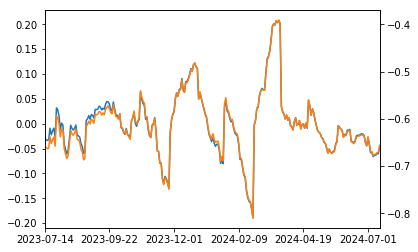

In [203]:
# check OLS
Y = 2 * my_df['7y'] - my_df['10y'] - my_df['2y']
X = pd.concat([my_df['7y'], my_df['10y'] - my_df['2y']], axis=1)
X = sm.add_constant(X)
ols = sm.OLS(Y, X).fit() 
ax = ols.resid.plot()
(2 * my_df['7y'] - 1.6 * my_df['10y'] - 0.5 * my_df['2y']).plot(secondary_y=True, ax=ax)